In [212]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
'''
Open picklefiles for player data. Split over three scrape sessions for general
player data and onme scrape session for rankings data.
'''
with open("players_second.pkl", 'rb') as picklefile: 
    players_one = pickle.load(picklefile)
with open("players_second_two.pkl", 'rb') as picklefile: 
    players_two = pickle.load(picklefile)
with open("players_second_three.pkl", 'rb') as picklefile: 
    players_three = pickle.load(picklefile)
with open("players_rankings.pkl", 'rb') as picklefile: 
    players_rankings = pickle.load(picklefile)

In [119]:
#combine player lists into one
players = []
players.extend(players_one)
players.extend(players_two)
players.extend(players_three)
len(players)

13559

In [120]:
#turn list of dictionaries into dataframes
df_p = pd.DataFrame(players)
df_r = pd.DataFrame(players_rankings)

In [195]:
pd.options.display.max_columns = 26

In [122]:
df_p.describe()

1st Serve 1st Serve Points Won 1st Serve Return Points Won  \
count       2439                 2439                        2439   
unique        45                   54                          44   
top           0%                   0%                          0%   
freq         542                  542                         548   

       2nd Serve Points Won 2nd Serve Return Points Won  Aces  \
count                  2439                        2439  2439   
unique                   56                          56   482   
top                      0%                          0%     0   
freq                    542                         546   587   

       Break Points Converted Break Points Faced Break Points Opportunities  \
count                    2439               2439                       2439   
unique                     66                438                        485   
top                        0%                  0                          0   
freq                      659                542                        580   

       Break Points Saved Double Faults               Player Record  \
count                2439          2439                13559  13557   
unique                 65           240                 1505    601   
top                    0%             0  Luca George Tatomir    0-0   
freq                  559           563                   10   6738   

       Return Games Played Return Games Won Return Points Won  \
count                 2439             2439              2439   
unique                 673               47                41   
top                      0               0%                0%   
freq                   544              661               544   

       Service Games Played Service Games Won Total Points Won  \
count                  2439              2439             2439   
unique                  676                71               33   
top                       0                0%               0%   
freq                    544               545              542   

       Total Service Points Won Winnings   Year  
count                      2439    13557  13559  
unique                       46     6072      9  
top                          0%     None   2010  
freq                        542     4335   1515

In [123]:
#merge 2018 rankings data into player dataframe
df = pd.merge(df_p,df_r,on='Player')

In [124]:
df.head()

1st Serve 1st Serve Points Won 1st Serve Return Points Won  \
0       68%                  74%                         35%   
1       70%                  69%                         35%   
2       68%                  72%                         33%   
3       70%                  72%                         35%   
4       69%                  73%                         35%   

  2nd Serve Points Won 2nd Serve Return Points Won Aces  \
0                  61%                         56%  286   
1                  54%                         56%  115   
2                  55%                         53%  222   
3                  55%                         56%  181   
4                  57%                         54%  221   

  Break Points Converted Break Points Faced Break Points Opportunities  \
0                    41%                340                        718   
1                    45%                339                        475   
2                    42%                425                        699   
3                    48%                312                        514   
4                    47%                356                        662   

  Break Points Saved Double Faults        Player Record Return Games Played  \
0                70%           123  Rafael Nadal  67-11                 908   
1                70%            88  Rafael Nadal  39-14                 530   
2                62%           166  Rafael Nadal  61-20                 959   
3                66%            90  Rafael Nadal  48-11                 712   
4                69%           120  Rafael Nadal   75-7                 916   

  Return Games Won Return Points Won Service Games Played Service Games Won  \
0              33%               43%                  939               89%   
1              41%               44%                  542               81%   
2              31%               41%                  965               83%   
3              35%               43%                  713               85%   
4              34%               42%                  913               88%   

  Total Points Won Total Service Points Won     Winnings  Year Ranking  
0              56%                      70%  $12,691,341  2017       1  
1              55%                      64%   $2,714,278  2016       1  
2              53%                      66%   $3,856,515  2015       1  
3              55%                      67%   $6,202,445  2014       1  
4              55%                      68%  $12,060,917  2013       1

In [125]:
df_new = df.sort_values(by='1st Serve',ascending=False).iloc[0:1897,:].reset_index().copy()

In [126]:
df_new.drop(labels='index',axis=1,inplace=True)

In [127]:
df_new.head()

1st Serve 1st Serve Points Won 1st Serve Return Points Won  \
0       88%                  50%                         38%   
1       84%                  62%                         26%   
2       83%                  60%                         28%   
3       83%                  64%                         34%   
4       81%                  54%                          0%   

  2nd Serve Points Won 2nd Serve Return Points Won Aces  \
0                  50%                         39%    0   
1                  33%                          7%    7   
2                  53%                         44%    2   
3                  59%                         33%    2   
4                  33%                         33%    1   

  Break Points Converted Break Points Faced Break Points Opportunities  \
0                    14%                  7                          7   
1                     0%                  7                          0   
2                    38%                 10                          8   
3                    33%                  5                          6   
4                     0%                  2                          0   

  Break Points Saved Double Faults                Player Record  \
0                43%             2           Pedro Sousa    1-2   
1                57%             1       Roman Safiullin    0-1   
2                40%             1           Pedro Sousa    4-1   
3                40%             0   Rogerio Dutra Silva    0-0   
4                50%             2  Daniel Gimeno-Traver    0-1   

  Return Games Played Return Games Won Return Points Won Service Games Played  \
0                   9              11%               38%                    8   
1                   9               0%               20%                    9   
2                  19              16%               34%                   17   
3                  14              14%               34%                   15   
4                   3               0%               20%                    2   

  Service Games Won Total Points Won Total Service Points Won  Winnings  Year  \
0               50%              43%                      50%   $39,820  2016   
1               67%              41%                      57%   $17,334  2017   
2               65%              45%                      59%  $109,827  2017   
3               80%              49%                      63%    $9,761  2010   
4               50%              35%                      50%   $32,879  2017   

  Ranking  
0     119  
1     381  
2     119  
3     125  
4     272

In [128]:
df_new.set_index(['Player','Year'])

1st Serve 1st Serve Points Won  \
Player                       Year                                  
Pedro Sousa                  2016       88%                  50%   
Roman Safiullin              2017       84%                  62%   
Pedro Sousa                  2017       83%                  60%   
Rogerio Dutra Silva          2010       83%                  64%   
Daniel Gimeno-Traver         2017       81%                  54%   
Andres Artunedo Martinavarro 2014       77%                  67%   
Eduardo Struvay              2014       76%                  65%   
Riccardo Bellotti            2017       76%                  55%   
Austin Krajicek              2017       76%                  78%   
Guilherme Clezar             2011       76%                  56%   
Blaz Kavcic                  2009       76%                  59%   
Ze Zhang                     2010       76%                  71%   
John Millman                 2011       76%                  72%   
Jurgen Melzer                2017       75%                  57%   
Kristijan Mesaros            2012       75%                  56%   
Fabiano De Paula             2014       75%                  55%   
Pedro Sousa                  2012       74%                  55%   
Salvatore Caruso             2017       74%                  58%   
Philipp Davydenko            2014       74%                  67%   
Kenny De Schepper            2016       73%                  65%   
Simone Bolelli               2017       73%                  62%   
Ze Zhang                     2013       73%                  62%   
Alexander Ward               2013       73%                  65%   
Kenny De Schepper            2017       73%                  70%   
Darian King                  2016       73%                  79%   
                             2015       72%                  42%   
Carlos Berlocq               2016       72%                  60%   
Marco Cecchinato             2013       72%                  55%   
Gonzalo Escobar              2016       72%                  59%   
Omar Jasika                  2016       72%                  68%   
...                                     ...                  ...   
Robin Kern                   2011       48%                  66%   
Stephane Robert              2012       47%                  69%   
Mate Pavic                   2017       47%                  63%   
Marco Trungelliti            2012       47%                  60%   
Antoine Bellier              2016       47%                  72%   
Lamine Ouahab                2009       47%                  61%   
Dennis Novikov               2015       47%                  65%   
Stephane Robert              2017       47%                  65%   
Yannick Maden                2016       46%                  53%   
Andreas Haider-Maurer        2009       46%                  69%   
Eduardo Struvay              2013       46%                  70%   
Henri Laaksonen              2012       45%                  69%   
Germain Gigounon             2015       45%                  53%   
Arthur De Greef              2015       45%                  63%   
Manuel Sanchez               2011       45%                  59%   
Inigo Cervantes              2017       45%                  62%   
Stefan Kozlov                2013       44%                  74%   
Ricardo Hocevar              2009       44%                  68%   
Romain Jouan                 2011       44%                  58%   
Martin Klizan                2009       44%                  64%   
Marsel Ilhan                 2017       44%                  85%   
Stefan Kozlov                2015       44%                  48%   
Sergio Gutierrez-Ferrol      2011       43%                  81%   
Kento Takeuchi               2014       42%                  39%   
Evgeny Donskoy               2009       42%                  81%   
Yann Marti                   2010       41%                  66%   
Mikhail Elgin         

In [129]:
df_new['1st Serve'] = df_new['1st Serve'].apply(lambda x: int(x.strip('%'))/100)
df_new['1st Serve Points Won'] = df_new['1st Serve Points Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['1st Serve Return Points Won'] = df_new['1st Serve Return Points Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['2nd Serve Points Won'] = df_new['2nd Serve Points Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['Break Points Converted'] = df_new['Break Points Converted'].apply(lambda x: int(x.strip('%'))/100)
df_new['Break Points Saved'] = df_new['Break Points Saved'].apply(lambda x: int(x.strip('%'))/100)

In [130]:
df_new['Return Games Won'] = df_new['Return Games Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['Return Points Won'] = df_new['Return Points Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['Service Games Won'] = df_new['Service Games Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['Total Points Won'] = df_new['Total Points Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['Total Service Points Won'] = df_new['Total Service Points Won'].apply(lambda x: int(x.strip('%'))/100)
df_new['2nd Serve Return Points Won'] = df_new['2nd Serve Return Points Won'].apply(lambda x: int(x.strip('%'))/100)

In [131]:
df_new['Aces'] = df_new['Aces'].apply(lambda x: int(x.replace(',','')))
df_new['Return Games Played'] = df_new['Return Games Played'].apply(lambda x: int(x.replace(',','')))
df_new['Service Games Played'] = df_new['Service Games Played'].apply(lambda x: int(x.replace(',','')))

In [132]:
df_new['Break Points Faced'] = df_new['Break Points Faced'].apply(lambda x: int(x.replace(',','')))
df_new['Break Points Opportunities'] = df_new['Break Points Opportunities'].apply(lambda x: int(x.replace(',','')))
df_new['Double Faults'] = df_new['Double Faults'].apply(lambda x: int(x.replace(',','')))

In [133]:
df_new['Winnings'].values

array(['$39,820', '$17,334', '$109,827', ..., '$44,566', '$17,527',
       '$8,869'], dtype=object)

In [146]:
df_new = df_new.drop(df_new[df_new.Winnings == 'None'].index)

In [147]:
df_new[df_new['Winnings']=='None']

Empty DataFrame
Columns: [1st Serve, 1st Serve Points Won, 1st Serve Return Points Won, 2nd Serve Points Won, 2nd Serve Return Points Won, Aces, Break Points Converted, Break Points Faced, Break Points Opportunities, Break Points Saved, Double Faults, Player, Record, Return Games Played, Return Games Won, Return Points Won, Service Games Played, Service Games Won, Total Points Won, Total Service Points Won, Winnings, Year, Ranking]
Index: []

In [172]:
import math

In [175]:
#df_new[df_new['Winnings'].apply(math.isnan)]

In [183]:
df_new = df_new.dropna(subset=['Winnings'])

In [184]:
def clean_winnings(x):
    print(x,type(x))
    return int(x.replace(',','').replace('$',''))

In [185]:
df_new['Winnings'] = df_new['Winnings'].apply(clean_winnings)

$39,820 <class 'str'>
$17,334 <class 'str'>
$109,827 <class 'str'>
$9,761 <class 'str'>
$32,879 <class 'str'>
$10,434 <class 'str'>
$24,218 <class 'str'>
$61,154 <class 'str'>
$52,940 <class 'str'>
$18,829 <class 'str'>
$75,830 <class 'str'>
$25,635 <class 'str'>
$20,804 <class 'str'>
$80,170 <class 'str'>
$10,278 <class 'str'>
$8,103 <class 'str'>
$41,618 <class 'str'>
$75,793 <class 'str'>
$20,344 <class 'str'>
$137,647 <class 'str'>
$214,496 <class 'str'>
$57,974 <class 'str'>
$17,398 <class 'str'>
$116,305 <class 'str'>
$70,674 <class 'str'>
$36,018 <class 'str'>
$201,475 <class 'str'>
$47,814 <class 'str'>
$5,973 <class 'str'>
$59,831 <class 'str'>
$11,302 <class 'str'>
$489,973 <class 'str'>
$14,309 <class 'str'>
$22,509 <class 'str'>
$1,707,551 <class 'str'>
$201,163 <class 'str'>
$113,026 <class 'str'>
$9,153 <class 'str'>
$22,367 <class 'str'>
$5,939 <class 'str'>
$9,259 <class 'str'>
$6,202,445 <class 'str'>
$1,681,843 <class 'str'>
$61,817 <class 'str'>
$68,286 <class 'str'>

$1,992 <class 'str'>
$345,468 <class 'str'>
$509,029 <class 'str'>
$700,132 <class 'str'>
$38,235 <class 'str'>
$62,591 <class 'str'>
$149,433 <class 'str'>
$990,822 <class 'str'>
$340,582 <class 'str'>
$353,915 <class 'str'>
$929,859 <class 'str'>
$275,321 <class 'str'>
$210,330 <class 'str'>
$162,861 <class 'str'>
$42,168 <class 'str'>
$250,039 <class 'str'>
$356,401 <class 'str'>
$494,004 <class 'str'>
$88,160 <class 'str'>
$561,477 <class 'str'>
$2,130,515 <class 'str'>
$52,053 <class 'str'>
$125,955 <class 'str'>
$152,604 <class 'str'>
$6,130 <class 'str'>
$637,513 <class 'str'>
$1,435,597 <class 'str'>
$88,039 <class 'str'>
$349,633 <class 'str'>
$454,229 <class 'str'>
$695,065 <class 'str'>
$140,414 <class 'str'>
$84,600 <class 'str'>
$405,210 <class 'str'>
$28,921 <class 'str'>
$991,907 <class 'str'>
$875,350 <class 'str'>
$70,775 <class 'str'>
$90,594 <class 'str'>
$97,021 <class 'str'>
$1,936,220 <class 'str'>
$968,791 <class 'str'>
$1,025,094 <class 'str'>
$39,300 <class 'st

$41,741 <class 'str'>
$97,405 <class 'str'>
$28,540 <class 'str'>
$1,138,512 <class 'str'>
$18,700 <class 'str'>
$609,483 <class 'str'>
$8,435 <class 'str'>
$74,579 <class 'str'>
$667,986 <class 'str'>
$5,641 <class 'str'>
$32,035 <class 'str'>
$311,633 <class 'str'>
$95,273 <class 'str'>
$236,353 <class 'str'>
$3,653,909 <class 'str'>
$929,964 <class 'str'>
$979,470 <class 'str'>
$106,516 <class 'str'>
$243,210 <class 'str'>
$19,217 <class 'str'>
$117,531 <class 'str'>
$2,071,625 <class 'str'>
$123,167 <class 'str'>
$371,614 <class 'str'>
$729,009 <class 'str'>
$339,436 <class 'str'>
$1,085,883 <class 'str'>
$199,752 <class 'str'>
$173,581 <class 'str'>
$229,701 <class 'str'>
$52,917 <class 'str'>
$122,918 <class 'str'>
$566,868 <class 'str'>
$208,137 <class 'str'>
$119,571 <class 'str'>
$138,634 <class 'str'>
$4,588,236 <class 'str'>
$47,302 <class 'str'>
$255,276 <class 'str'>
$41,441 <class 'str'>
$293,972 <class 'str'>
$176,996 <class 'str'>
$70,145 <class 'str'>
$47,298 <class 's

$68,623 <class 'str'>
$2,519 <class 'str'>
$209,664 <class 'str'>
$10,644 <class 'str'>
$104,851 <class 'str'>
$553,169 <class 'str'>
$84,685 <class 'str'>
$1,673,931 <class 'str'>
$998,016 <class 'str'>
$80,177 <class 'str'>
$11,478 <class 'str'>
$389,487 <class 'str'>
$9,281 <class 'str'>
$1,116,563 <class 'str'>
$310,770 <class 'str'>
$561,193 <class 'str'>
$72,019 <class 'str'>
$95,923 <class 'str'>
$199,962 <class 'str'>
$11,749 <class 'str'>
$758,290 <class 'str'>
$101,247 <class 'str'>
$377,331 <class 'str'>
$369,643 <class 'str'>
$283,496 <class 'str'>
$432,043 <class 'str'>
$100,609 <class 'str'>
$9,645 <class 'str'>
$51,139 <class 'str'>
$43,624 <class 'str'>
$52,640 <class 'str'>
$114,668 <class 'str'>
$91,672 <class 'str'>
$306,891 <class 'str'>
$8,449 <class 'str'>
$100,183 <class 'str'>
$6,030 <class 'str'>
$20,241 <class 'str'>
$16,308 <class 'str'>
$139,119 <class 'str'>
$311,279 <class 'str'>
$301,145 <class 'str'>
$279,036 <class 'str'>
$86,428 <class 'str'>
$3,466,86

In [186]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1896
Data columns (total 23 columns):
1st Serve                      1894 non-null float64
1st Serve Points Won           1894 non-null float64
1st Serve Return Points Won    1894 non-null float64
2nd Serve Points Won           1894 non-null float64
2nd Serve Return Points Won    1894 non-null float64
Aces                           1894 non-null int64
Break Points Converted         1894 non-null float64
Break Points Faced             1894 non-null int64
Break Points Opportunities     1894 non-null int64
Break Points Saved             1894 non-null float64
Double Faults                  1894 non-null int64
Player                         1894 non-null object
Record                         1894 non-null object
Return Games Played            1894 non-null int64
Return Games Won               1894 non-null float64
Return Points Won              1894 non-null float64
Service Games Played           1894 non-null int64
Servic

In [188]:
df_new.head()

1st Serve  1st Serve Points Won  1st Serve Return Points Won  \
0       0.88                  0.50                         0.38   
1       0.84                  0.62                         0.26   
2       0.83                  0.60                         0.28   
3       0.83                  0.64                         0.34   
4       0.81                  0.54                         0.00   

   2nd Serve Points Won  2nd Serve Return Points Won  Aces  \
0                  0.50                         0.39     0   
1                  0.33                         0.07     7   
2                  0.53                         0.44     2   
3                  0.59                         0.33     2   
4                  0.33                         0.33     1   

   Break Points Converted  Break Points Faced  Break Points Opportunities  \
0                    0.14                   7                           7   
1                    0.00                   7                           0   
2                    0.38                  10                           8   
3                    0.33                   5                           6   
4                    0.00                   2                           0   

   Break Points Saved  Double Faults                Player Record  \
0                0.43              2           Pedro Sousa    1-2   
1                0.57              1       Roman Safiullin    0-1   
2                0.40              1           Pedro Sousa    4-1   
3                0.40              0   Rogerio Dutra Silva    0-0   
4                0.50              2  Daniel Gimeno-Traver    0-1   

   Return Games Played  Return Games Won  Return Points Won  \
0                    9              0.11               0.38   
1                    9              0.00               0.20   
2                   19              0.16               0.34   
3                   14              0.14               0.34   
4                    3              0.00               0.20   

   Service Games Played  Service Games Won  Total Points Won  \
0                     8               0.50              0.43   
1                     9               0.67              0.41   
2                    17               0.65              0.45   
3                    15               0.80              0.49   
4                     2               0.50              0.35   

   Total Service Points Won  Winnings  Year Ranking  
0                      0.50     39820  2016     119  
1                      0.57     17334  2017     381  
2                      0.59    109827  2017     119  
3                      0.63      9761  2010     125  
4                      0.50     32879  2017     272

In [193]:
df_new['Wins'] = df_new['Record'].apply(lambda x: x.split('-')[0])
df_new['Losses'] = df_new['Record'].apply(lambda x: x.split('-')[1])

In [196]:
df_new

1st Serve  1st Serve Points Won  1st Serve Return Points Won  \
0          0.88                  0.50                         0.38   
1          0.84                  0.62                         0.26   
2          0.83                  0.60                         0.28   
3          0.83                  0.64                         0.34   
4          0.81                  0.54                         0.00   
5          0.77                  0.67                         0.09   
6          0.76                  0.65                         0.31   
7          0.76                  0.55                         0.35   
8          0.76                  0.78                         0.16   
9          0.76                  0.56                         0.24   
10         0.76                  0.59                         0.34   
11         0.76                  0.71                         0.27   
12         0.76                  0.72                         0.27   
13         0.75                  0.57                         0.23   
14         0.75                  0.56                         0.19   
15         0.75                  0.55                         0.25   
16         0.74                  0.55                         0.32   
17         0.74                  0.58                         0.15   
18         0.74                  0.67                         0.25   
19         0.73                  0.65                         0.27   
20         0.73                  0.62                         0.26   
21         0.73                  0.62                         0.23   
22         0.73                  0.65                         0.27   
23         0.73                  0.70                         0.32   
24         0.73                  0.79                         0.00   
25         0.72                  0.42                         0.09   
26         0.72                  0.60                         0.32   
27         0.72                  0.55                         0.24   
28         0.72                  0.59                         0.31   
29         0.72                  0.68                         0.29   
...         ...                   ...                          ...   
1867       0.48                  0.66                         0.16   
1868       0.47                  0.69                         0.23   
1869       0.47                  0.63                         0.22   
1870       0.47                  0.60                         0.42   
1871       0.47                  0.72                         0.21   
1872       0.47                  0.61                         0.14   
1873       0.47                  0.65                         0.19   
1874       0.47                  0.65                         0.23   
1875       0.46                  0.53                         0.23   
1876       0.46                  0.69                         0.08   
1877       0.46                  0.70                         0.27   
1878       0.45                  0.69                         0.18   
1879       0.45                  0.53                         0.30   
1880       0.45                  0.63                         0.30   
1881       0.45                  0.59                         0.20   
1882       0.45                  0.62                         0.37   
1883       0.44                  0.74                         0.31   
1884       0.44                  0.68                         0.15   
1885       0.44                  0.58                         0.15   
1886       0.44                  0.64                         0.40   
1887       0.44                  0.85                         0.26   
1888       0.44                  0.48                         0.32   
1889       0.43                  0.81                         0.39   
1890       0.42                  0.39                         0.23   
1891       0.42                  0.81                         0.25   
1892       0.41 

In [197]:
df_f = df_new.copy()

In [202]:
df_f = df_f.drop('Record',axis=1)

In [206]:
df_f = df_f.set_index(['Player','Year'])

In [241]:
cols = list(df_f.columns)
cols = ['1st Serve',
 '1st Serve Points Won',
 '1st Serve Return Points Won',
 '2nd Serve Points Won',
 '2nd Serve Return Points Won',
 'Aces',
 'Break Points Converted',
 'Break Points Faced',
 'Break Points Opportunities',
 'Break Points Saved',
 'Double Faults',
 'Return Games Played',
 'Return Games Won',
 'Return Points Won',
 'Service Games Played',
 'Service Games Won',
 'Total Points Won',
 'Total Service Points Won',
'Wins',
 'Losses',
 'Winnings',
 'Ranking',
 ]

In [242]:
df_f = df_f[cols]

In [245]:
df_f.head()

1st Serve  1st Serve Points Won  \
Player               Year                                    
Pedro Sousa          2016       0.88                  0.50   
Roman Safiullin      2017       0.84                  0.62   
Pedro Sousa          2017       0.83                  0.60   
Rogerio Dutra Silva  2010       0.83                  0.64   
Daniel Gimeno-Traver 2017       0.81                  0.54   

                           1st Serve Return Points Won  2nd Serve Points Won  \
Player               Year                                                      
Pedro Sousa          2016                         0.38                  0.50   
Roman Safiullin      2017                         0.26                  0.33   
Pedro Sousa          2017                         0.28                  0.53   
Rogerio Dutra Silva  2010                         0.34                  0.59   
Daniel Gimeno-Traver 2017                         0.00                  0.33   

                           2nd Serve Return Points Won  Aces  \
Player               Year                                      
Pedro Sousa          2016                         0.39     0   
Roman Safiullin      2017                         0.07     7   
Pedro Sousa          2017                         0.44     2   
Rogerio Dutra Silva  2010                         0.33     2   
Daniel Gimeno-Traver 2017                         0.33     1   

                           Break Points Converted  Break Points Faced  \
Player               Year                                               
Pedro Sousa          2016                    0.14                   7   
Roman Safiullin      2017                    0.00                   7   
Pedro Sousa          2017                    0.38                  10   
Rogerio Dutra Silva  2010                    0.33                   5   
Daniel Gimeno-Traver 2017                    0.00                   2   

                           Break Points Opportunities  Break Points Saved  \
Player               Year                                                   
Pedro Sousa          2016                           7                0.43   
Roman Safiullin      2017                           0                0.57   
Pedro Sousa          2017                           8                0.40   
Rogerio Dutra Silva  2010                           6                0.40   
Daniel Gimeno-Traver 2017                           0                0.50   

                           Double Faults  Return Games Played  \
Player               Year                                       
Pedro Sousa          2016              2                    9   
Roman Safiullin      2017              1                    9   
Pedro Sousa          2017              1                   19   
Rogerio Dutra Silva  2010              0                   14   
Daniel Gimeno-Traver 2017              2                    3   

                           Return Games Won  Return Points Won  \
Player               Year                                        
Pedro Sousa          2016              0.11               0.38   
Roman Safiullin      2017              0.00               0.20   
Pedro Sousa          2017              0.16               0.34   
Rogerio Dutra Silva  2010              0.14               0.34   
Daniel Gimeno-Traver 2017              0.00               0.20   

                           Service Games Played  Service Games Won  \
Player               Year                                            
Pedro Sousa          2016                     8               0.50   
Roman Safiullin      2017                     9               0.67   
Pedro Sousa          2017                    17               0.65   
Rogerio Dutra Silva  2010                    15               0.80   
Daniel Gimeno-Traver 2017                     2               0.50   

                           Total Points Won  Total Service Points Won Wins  \
Player               Year                 

In [287]:
df_f.to_pickle('players_d.pkl')

In [247]:
df_f.corr()

1st Serve  1st Serve Points Won  \
1st Serve                     1.000000             -0.037056   
1st Serve Points Won         -0.037056              1.000000   
1st Serve Return Points Won   0.046441              0.064612   
2nd Serve Points Won          0.127990              0.364597   
2nd Serve Return Points Won   0.018268              0.034389   
Aces                          0.103856              0.519891   
Break Points Converted       -0.013938             -0.028941   
Break Points Faced            0.093694              0.358556   
Break Points Opportunities    0.114599              0.384829   
Break Points Saved            0.111633              0.437019   
Double Faults                 0.039210              0.431952   
Return Games Played           0.122673              0.444508   
Return Games Won              0.018841              0.040687   
Return Points Won             0.029992              0.046708   
Service Games Played          0.123224              0.445447   
Service Games Won             0.167343              0.827759   
Total Points Won              0.176829              0.667087   
Total Service Points Won      0.209704              0.871127   
Winnings                      0.120443              0.261016   

                             1st Serve Return Points Won  \
1st Serve                                       0.046441   
1st Serve Points Won                            0.064612   
1st Serve Return Points Won                     1.000000   
2nd Serve Points Won                            0.112708   
2nd Serve Return Points Won                     0.352838   
Aces                                            0.172398   
Break Points Converted                          0.321054   
Break Points Faced                              0.356532   
Break Points Opportunities                      0.378782   
Break Points Saved                              0.069973   
Double Faults                                   0.296327   
Return Games Played                             0.325527   
Return Games Won                                0.773995   
Return Points Won                               0.846779   
Service Games Played                            0.325087   
Service Games Won                               0.149011   
Total Points Won                                0.515943   
Total Service Points Won                        0.103362   
Winnings                                        0.239526   

                             2nd Serve Points Won  \
1st Serve                                0.127990   
1st Serve Points Won                     0.364597   
1st Serve Return Points Won              0.112708   
2nd Serve Points Won                     1.000000   
2nd Serve Return Points Won              0.133044   
Aces                                     0.334764   
Break Points Converted                   0.070531   
Break Points Faced                       0.324903   
Break Points Opportunities               0.356421   
Break Points Saved                       0.376976   
Double Faults                            0.303170   
Return Games Played                      0.375701   
Return Games Won                         0.148732   
Return Points Won                        0.136713   
Service Games Played                     0.376350   
Service Games Won                        0.662756   
Total Points Won                         0.652057   
Total Service Points Won                 0.731586   
Winnings                                 0.261627   

                             2nd Serve Return Points Won      Aces  \
1st Serve                                       0.018268  0.103856   
1st Serve Points Won                            0.034389  0.519891   
1st Serve Return Points Won                     0.352838  0.172398   
2nd Serve Points Won                            0.133044  0.334764   
2nd Serve Return Points Won                     1.000000  0.128881   
Aces                                            0.128881  1.000000

(array([1.807e+03, 4.400e+01, 2.000e+01, 9.000e+00, 4.000e+00, 1.000e+00,
        7.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([       0. ,  1826712.5,  3653425. ,  5480137.5,  7306850. ,
         9133562.5, 10960275. , 12786987.5, 14613700. , 16440412.5,
        18267125. ]),
 <a list of 10 Patch objects>)

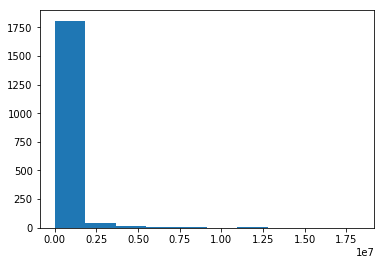

In [237]:
plt.hist(df_f['Winnings'])

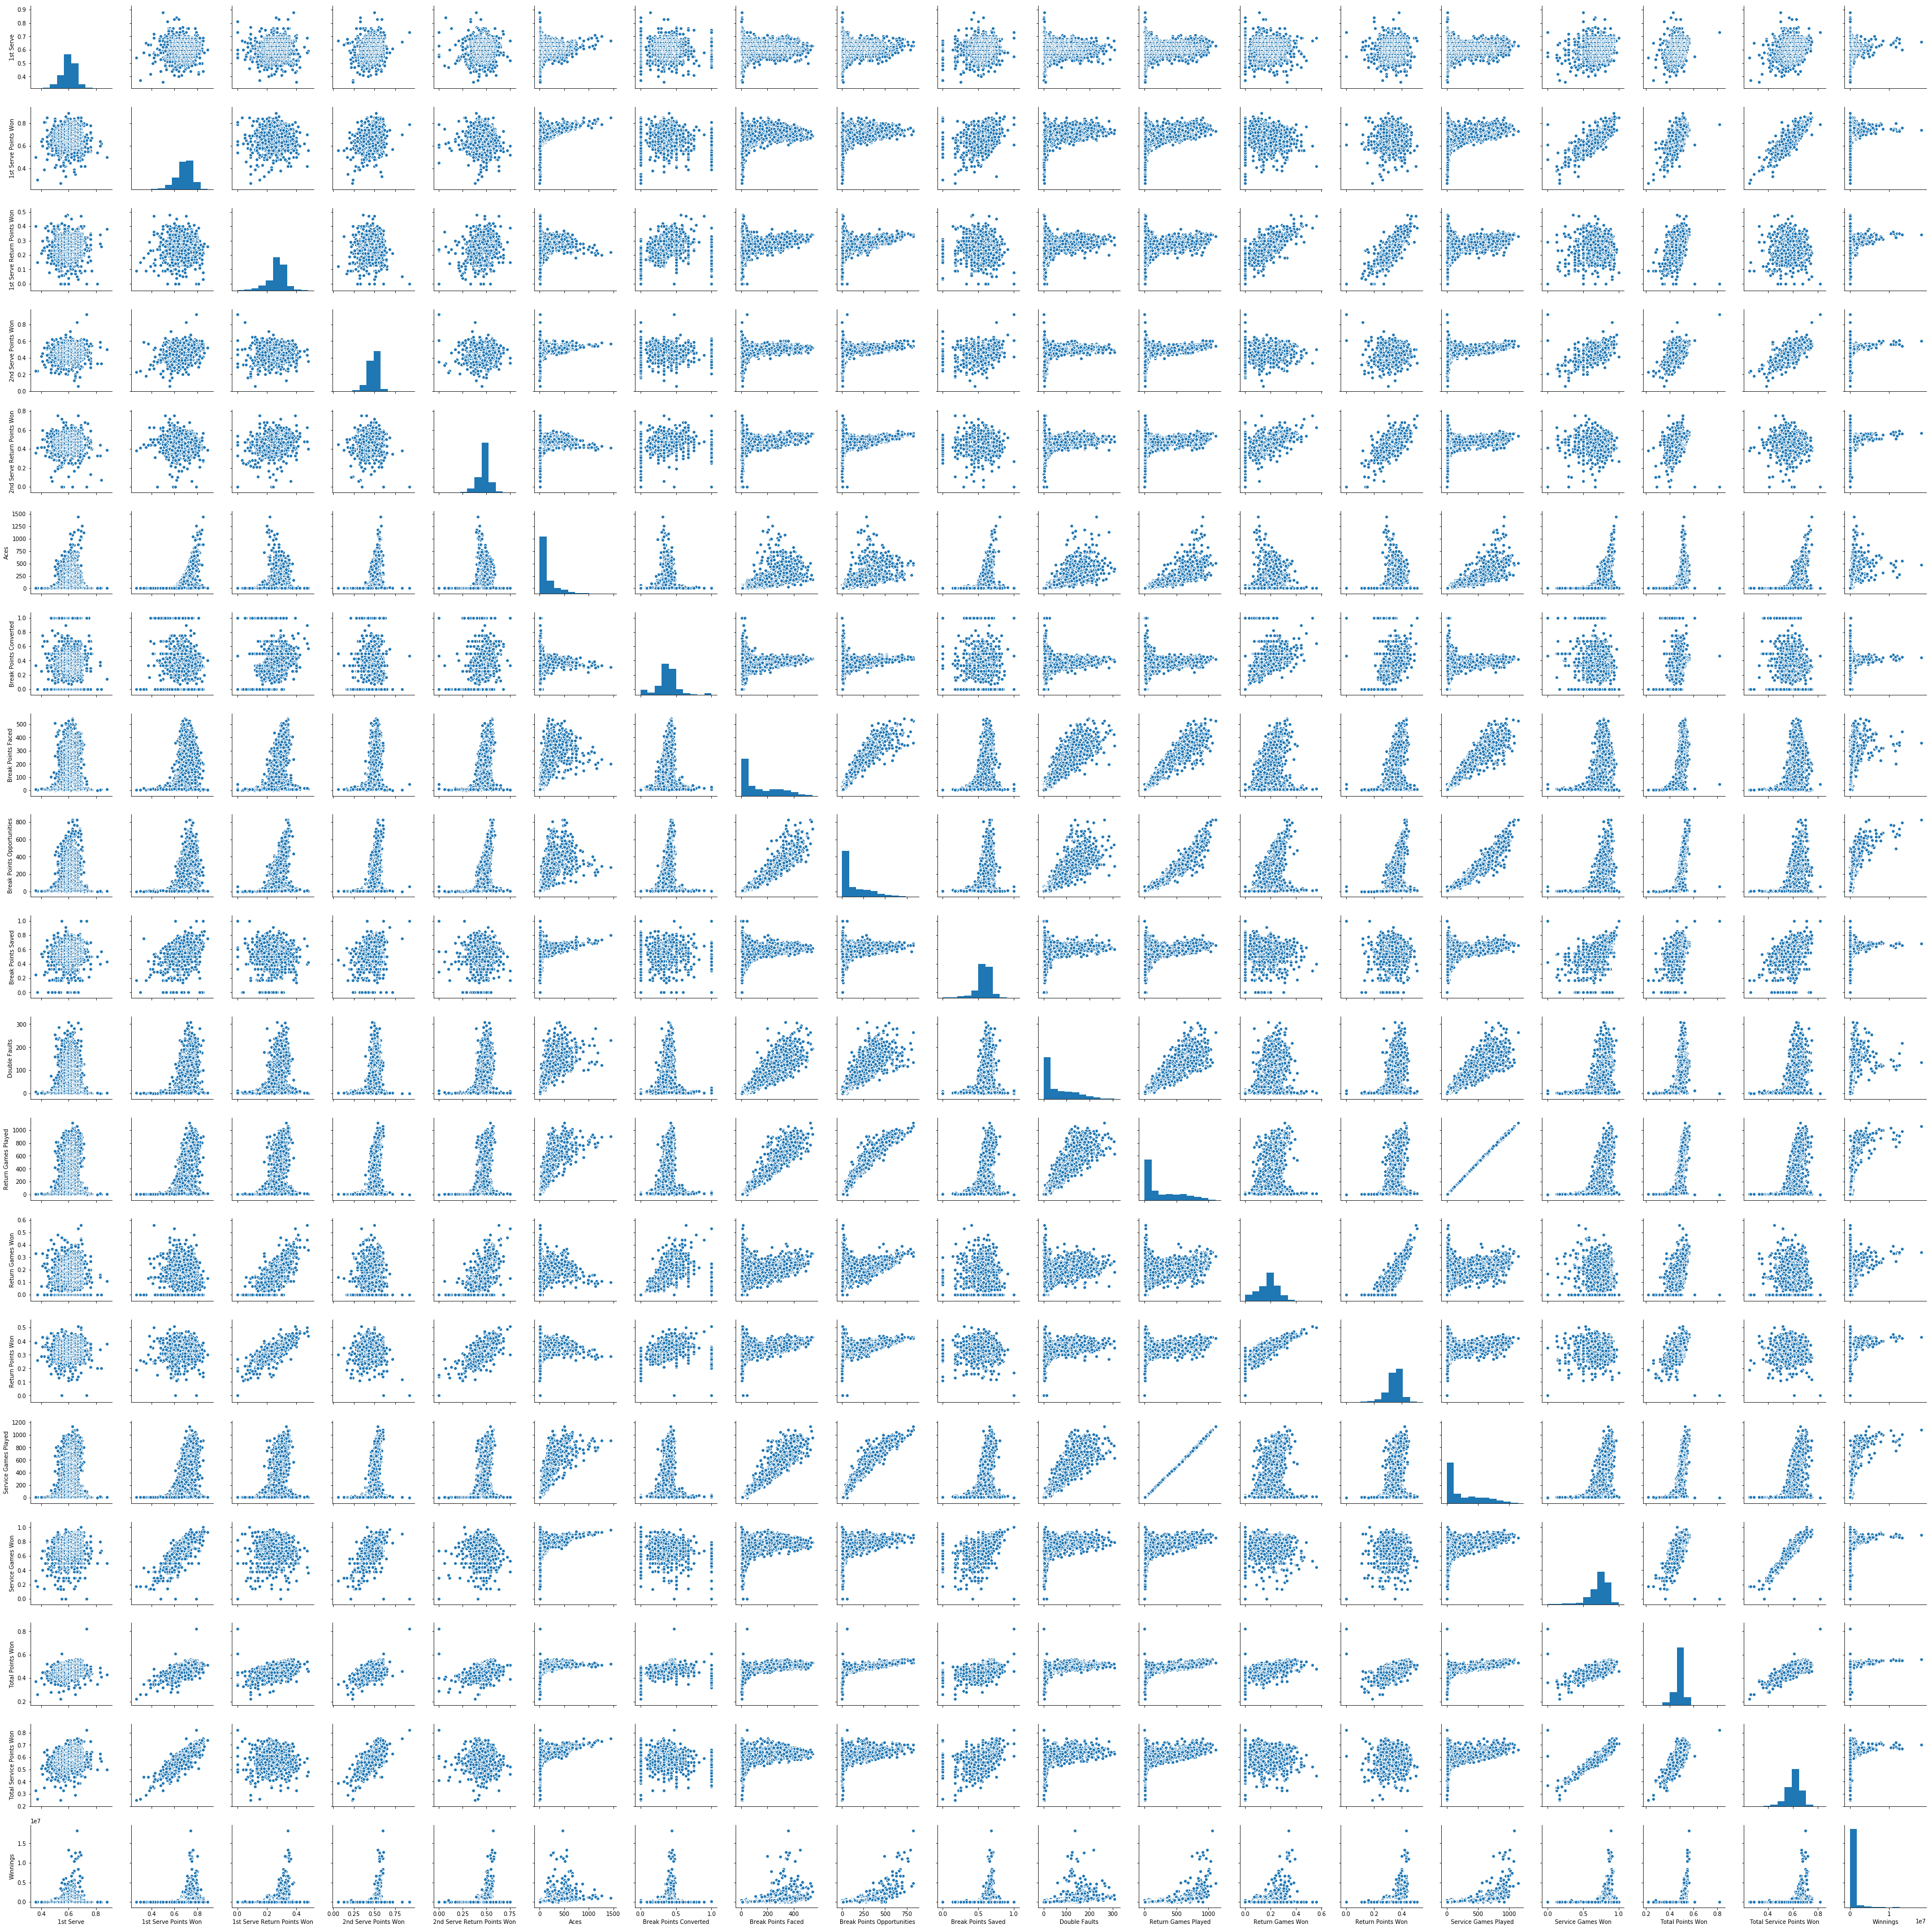

In [233]:
sns.pairplot(df_f.iloc[:,0:19])

In [248]:
from sklearn import model_selection
import patsy
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [250]:
s=df_f.iloc[:,0:18]
y=df_f['Winnings']
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.3)

In [251]:
y,X = patsy.dmatrices('y_train ~ x_train')

In [266]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        20:04:40   Log-Likelihood:                -19704.
No. Observations:                1325   AIC:                         3.945e+04
Df Residuals:                    1306   BIC:                         3.955e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.534e+04    6.2e+05      0.025      0.980    -1.2e+06    1.23e+06
x_train[0]   3.542e+05   7.02e+05      0.504      0.614   -1.02e+06    1.73e+06
x_train[1]    -2.4e+04   1.82e+06     -0.013      0.989   -3.59e+06    3.54e+06
x_train[2]   5.403e+05    1.1e+06      0.491      0.623   -1.62e+06     2.7e+06
x_train[3]  -5.027e+04   1.27e+06     -0.040      0.968   -2.54e+06    2.44e+06
x_train[4]   3.688e+05   7.34e+05      0.502      0.616   -1.07e+06    1.81e+06
x_train[5]  -1289.6510    387.754     -3.326      0.001   -2050.341    -528.961
x_train[6]   2.493e+05    1.6e+05      1.563      0.118   -6.36e+04    5.62e+05
x_train[7]  -1.321e+04    874.798    -15.102      0.000   -1.49e+04   -1.15e+04
x_train[8]    1.44e+04    759.252     18.966      0.000    1.29e+04    1.59e+04
x_train[9]   7.983e+05    2.2e+05      3.628      0.000    3.67e+05    1.23e+06
x_train[10] -2532.0751    856.955     -2.955      0.003   -4213.233    -850.917
x_train[11] -3.131e+04   4089.332     -7.655      0.000   -3.93e+04   -2.33e+04
x_train[12] -4.192e+05   6.51e+05     -0.644      0.520    -1.7e+06    8.58e+05
x_train[13] -2.054e+05   1.95e+06     -0.105      0.916   -4.03e+06    3.62e+06
x_train[14]  3.303e+04   4035.338      8.186      0.000    2.51e+04    4.09e+04
x_train[15] -3.759e+05   5.72e+05     -0.657      0.511    -1.5e+06    7.47e+05
x_train[16] -2.719e+06   2.44e+06     -1.116      0.265    -7.5e+06    2.06e+06
x_train[17]  1.385e+06   3.39e+06      0.408      0.683   -5.27e+06    8.04e+06
==============================================================================
Omnibus:                     1214.762   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115903.219
Skew:                           3.853   Prob(JB):                         0.00
Kurtosis:                      48.166   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

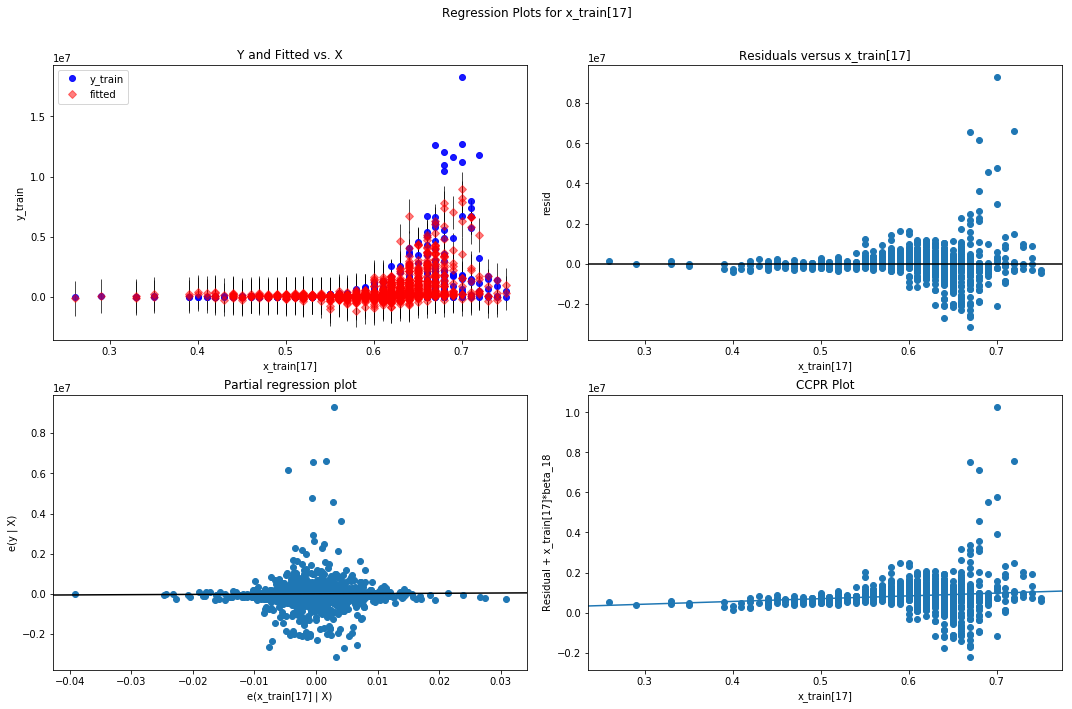

In [260]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(fit,'x_train[17]',fig=fig)

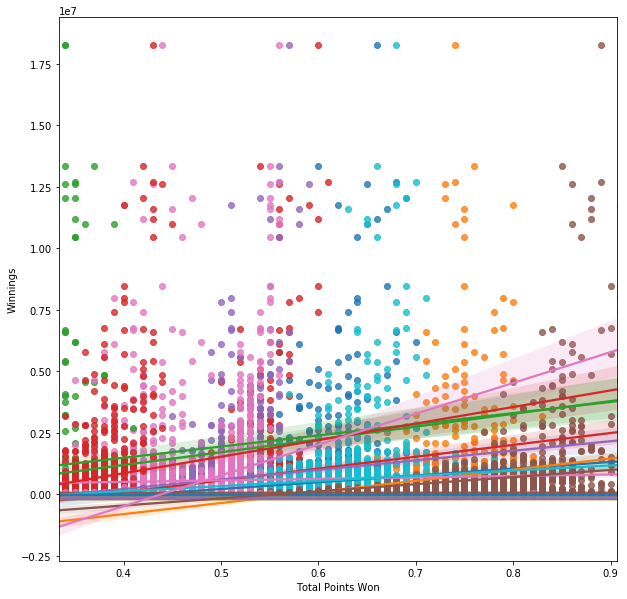

In [263]:
plt.figure(figsize=(10,10))
for i in df_f.columns[0:17]:
    sns.regplot(x=i,y='Winnings',data=df_f)

In [274]:
import statsmodels.formula.api as smf

In [281]:
df_train = x_train.copy()
df_train['Winnings'] = y_train
df_train

1st Serve  1st Serve Points Won  \
Player                      Year                                    
Yannick Hanfmann            2017       0.64                  0.69   
Guillermo Garcia-Lopez      2009       0.61                  0.69   
Kenny De Schepper           2014       0.65                  0.73   
Kamil Majchrzak             2017       0.52                  0.69   
Nicolas Almagro             2014       0.56                  0.77   
Joao Souza                  2015       0.62                  0.70   
Novak Djokovic              2013       0.66                  0.75   
Yen-Hsun Lu                 2011       0.61                  0.69   
Alexandr Dolgopolov         2009       0.67                  0.69   
Janko Tipsarevic            2017       0.54                  0.72   
Cristobal Saavedra-Corvalan 2010       0.64                  0.57   
Gerald Melzer               2010       0.51                  0.67   
Steven Diez                 2014       0.48                  0.58   
Joao Souza                  2012       0.64                  0.64   
Andrey Kuznetsov            2014       0.60                  0.71   
Tommy Paul                  2016       0.57                  0.68   
Santiago Giraldo            2017       0.60                  0.68   
Jack Sock                   2015       0.57                  0.75   
Tallon Griekspoor           2017       0.65                  0.61   
Carlos Berlocq              2012       0.66                  0.66   
Ramkumar Ramanathan         2017       0.56                  0.76   
Dennis Novikov              2012       0.50                  0.77   
Kevin Anderson              2010       0.66                  0.75   
James Ward                  2009       0.52                  0.78   
Markus Eriksson             2014       0.56                  0.38   
Marinko Matosevic           2015       0.59                  0.65   
Marcel Granollers           2017       0.64                  0.66   
David Ferrer                2016       0.62                  0.69   
Gilles Simon                2017       0.56                  0.68   
Ryan Harrison               2010       0.61                  0.70   
...                                     ...                   ...   
Reda El Amrani              2010       0.56                  0.68   
Andrey Golubev              2015       0.60                  0.68   
Yen-Hsun Lu                 2015       0.58                  0.71   
Tommy Haas                  2010       0.61                  0.71   
Javier Marti                2013       0.63                  0.57   
Jimmy Wang                  2014       0.62                  0.64   
Cedrik-Marcel Stebe         2013       0.65                  0.66   
Jo-Wilfried Tsonga          2017       0.61                  0.80   
Bernard Tomic               2011       0.66                  0.71   
Steve Darcis                2014       0.61                  0.67   
Daniel Evans                2009       0.66                  0.54   
Andrea Arnaboldi            2015       0.57                  0.68   
Jack Sock                   2010       0.55                  0.63   
Nicolas Mahut               2009       0.61                  0.78   
Gilles Simon                2013       0.58                  0.68   
Jurgen Zopp                 2012       0.61                  0.69   
Aslan Karatsev              2015       0.65                  0.62   
Riccardo Ghedin             2012       0.70                  0.58   
Yuki Bhambri                2012       0.60                  0.67   
Yan Bai                     2015       0.52                  0.71   
Gael Monfils                2014       0.65                  0.73   
Yuki Bhambri                2016       0.62                  0.58   
Benjamin Becker             2014       0.59                  0.74   
Mate Pavic                  2013       0.56                  0.54   
Daniel Munoz de la Nava     2014       0.62                  0.59   
Pablo Cuevas                2013

In [282]:
model2 = smf.ols('y_train ~ x_train',data=df_train)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 24 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:38:57   Log-Likelihood:                -19704.
No. Observations:                1325   AIC:                         3.945e+04
Df Residuals:                    1306   BIC:                         3.955e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.534e+04    6.2e+05      0.025      0.980    -1.2e+06    1.23e+06
x_train[0]   3.542e+05   7.02e+05      0.504      0.614   -1.02e+06    1.73e+06
x_train[1]    -2.4e+04   1.82e+06     -0.013      0.989   -3.59e+06    3.54e+06
x_train[2]   5.403e+05    1.1e+06      0.491      0.623   -1.62e+06     2.7e+06
x_train[3]  -5.027e+04   1.27e+06     -0.040      0.968   -2.54e+06    2.44e+06
x_train[4]   3.688e+05   7.34e+05      0.502      0.616   -1.07e+06    1.81e+06
x_train[5]  -1289.6510    387.754     -3.326      0.001   -2050.341    -528.961
x_train[6]   2.493e+05    1.6e+05      1.563      0.118   -6.36e+04    5.62e+05
x_train[7]  -1.321e+04    874.798    -15.102      0.000   -1.49e+04   -1.15e+04
x_train[8]    1.44e+04    759.252     18.966      0.000    1.29e+04    1.59e+04
x_train[9]   7.983e+05    2.2e+05      3.628      0.000    3.67e+05    1.23e+06
x_train[10] -2532.0751    856.955     -2.955      0.003   -4213.233    -850.917
x_train[11] -3.131e+04   4089.332     -7.655      0.000   -3.93e+04   -2.33e+04
x_train[12] -4.192e+05   6.51e+05     -0.644      0.520    -1.7e+06    8.58e+05
x_train[13] -2.054e+05   1.95e+06     -0.105      0.916   -4.03e+06    3.62e+06
x_train[14]  3.303e+04   4035.338      8.186      0.000    2.51e+04    4.09e+04
x_train[15] -3.759e+05   5.72e+05     -0.657      0.511    -1.5e+06    7.47e+05
x_train[16] -2.719e+06   2.44e+06     -1.116      0.265    -7.5e+06    2.06e+06
x_train[17]  1.385e+06   3.39e+06      0.408      0.683   -5.27e+06    8.04e+06
==============================================================================
Omnibus:                     1214.762   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           115903.219
Skew:                           3.853   Prob(JB):                         0.00
Kurtosis:                      48.166   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Residuals of Linear Regression')

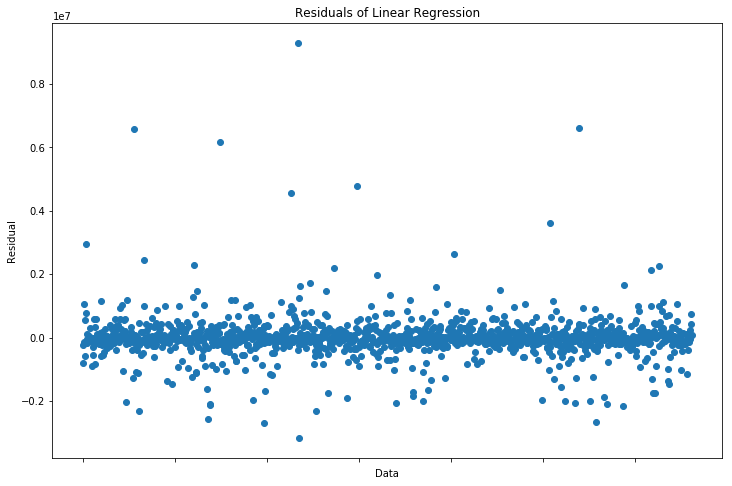

In [285]:
fit2.resid.plot(style='o',figsize=(12,8))
plt.xlabel('Data')
plt.ylabel('Residual')
plt.title('Residuals of Linear Regression')